<a href="https://colab.research.google.com/github/Nitroblaster99/steel_industry_ml/blob/main/Steel_Industry_Energy_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload data

In [ ]:
from google.colab import files

uploaded = files.upload()

Import important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the file

In [3]:
df = pd.read_csv('Steel_industry_data.csv')

Understand the dataset

In [4]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


Reactive Power (kVarh): This is the power that oscillates back and forth, not doing any actual work but is necessary for the system to function. It’s divided into “lagging” (inductive load) and “leading” (capacitive load).

Power Factor: This is the ratio of real power (doing actual work) to apparent power (the total power supplied). It's also divided into "lagging" (when current lags behind voltage) and "leading" (when current leads the voltage).

In short, these terms describe different aspects of how electrical power is used and managed in a power system.

Usage_kWh: The Energy Consumption, continuous value (kWh)

CO2: The CO2 emission, continuous value (ppm)

NSM: Number of Seconds from midnight, continuous value (s)

In [5]:
df.rename(columns={"Lagging_Current_Reactive.Power_kVarh": "Lagging_Current_Reactive_Power_kVarh",
                   "CO2(tCO2)": 'CO2'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [7]:
df.shape

(35040, 11)

In [8]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [9]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

Plot the date

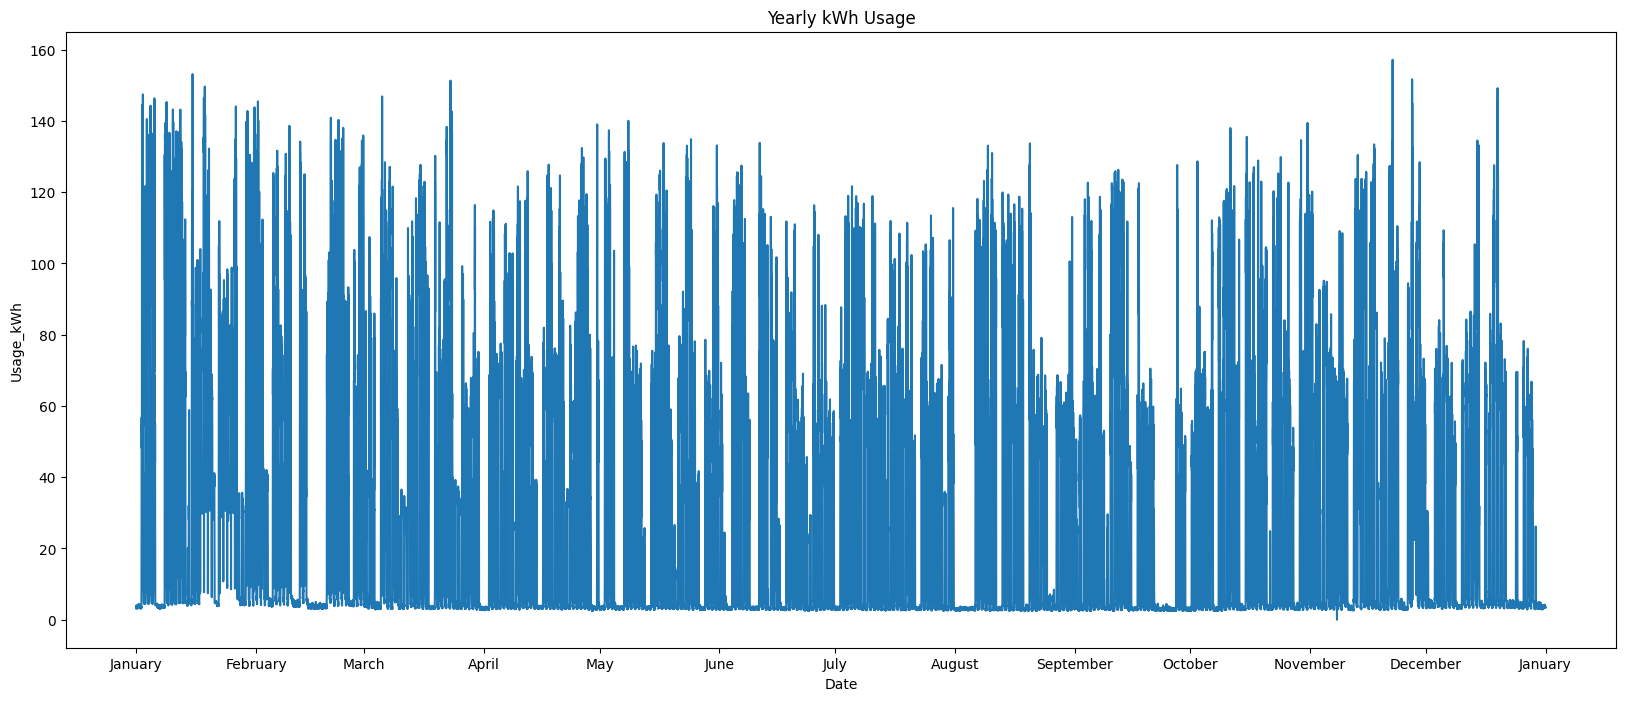

In [10]:
dates = df["date"]
kwh = df["Usage_kWh"]

plt.figure(figsize=(20,8))

x = ["01/01/2018 00:15", "01/02/2018 00:15", "01/03/2018 00:15", "01/04/2018 00:15",
     "01/05/2018 00:15", "01/06/2018 00:15", "01/07/2018 00:15", "01/08/2018 00:15",
     "01/09/2018 00:15", "01/10/2018 00:15", "01/11/2018 00:15", "01/12/2018 00:15","01/01/2019 00:15"]
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December', 'January']


plt.plot(dates, kwh)
plt.title("Yearly kWh Usage")
plt.xlabel("Date")
plt.ylabel("Usage_kWh")
plt.xticks(x, labels)

plt.show()

Data Exploration

In [11]:
df.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [12]:
df['WeekStatus'].value_counts()

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64

In [13]:
df['Day_of_week'].value_counts()

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64

In [14]:
df['Load_Type'].value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


Visualzing the data

<ipython-input-16-1ea08e1be644>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='WeekStatus', data=df, order=order, palette='hls')


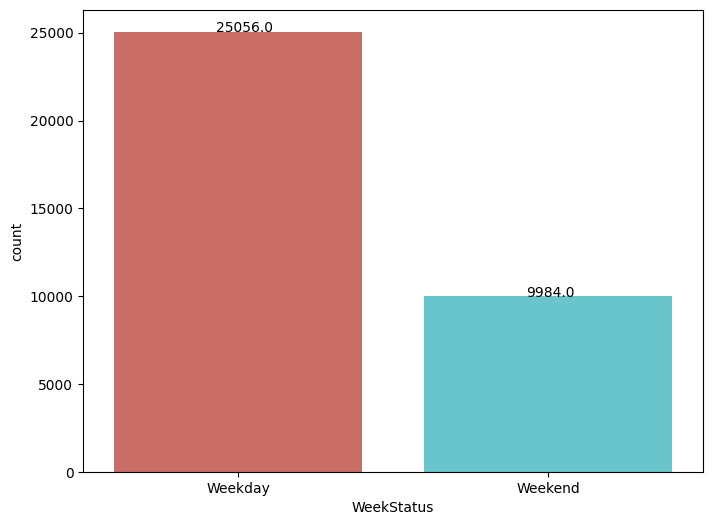

In [16]:
plt.figure(figsize=(8,6))

order = df['WeekStatus'].value_counts(ascending=False).index
ax = sns.countplot(x='WeekStatus', data=df, order=order, palette='hls')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+2))

plt.show()

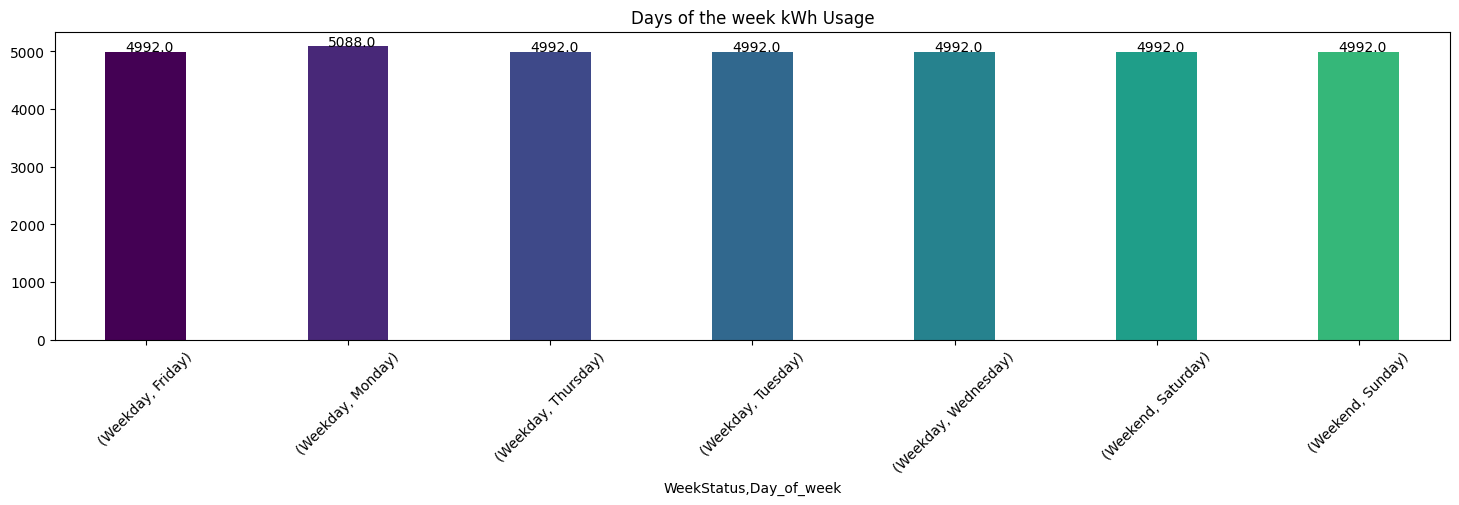

In [17]:
plt.figure(figsize=(18,4))
color= plt.cm.viridis(np.linspace(0,1,10))

ax = df.groupby(['WeekStatus', 'Day_of_week'])['Usage_kWh'].count().plot(kind='bar',
                                          width=.4, color=color)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))

plt.title('Days of the week kWh Usage')
plt.xticks(rotation=45)
plt.show()

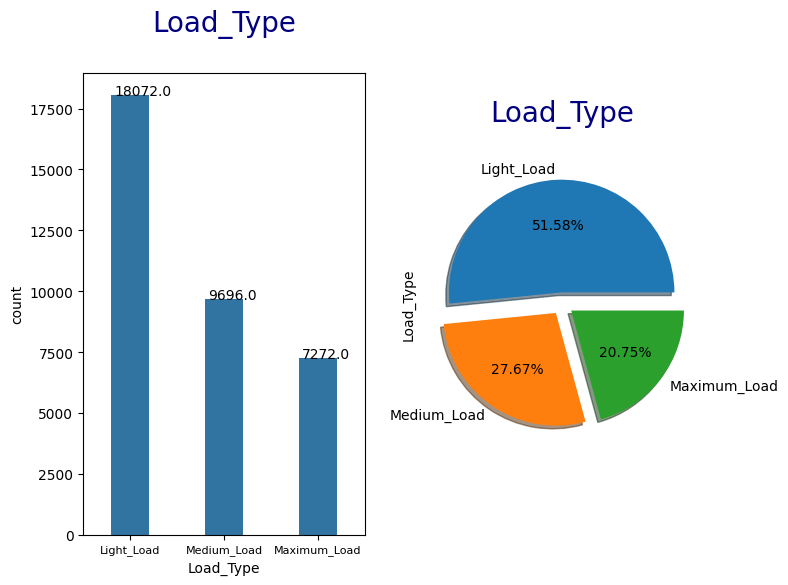

In [18]:
plt.figure(figsize=(8,6))

order = df['Load_Type'].value_counts(ascending=False).index
plt.subplot(1,2,1)
ax = sns.countplot(x='Load_Type', data=df, order=order, width=.4)
plt.title("Load_Type", fontsize=20,color='navy', pad=30)
plt.xticks(fontsize=8)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.033, p.get_height()+0.01))

plt.subplot(1,2,2)
df['Load_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],
                                        autopct='%1.2f%%', shadow=True)
plt.title("Load_Type", fontsize=20,color='navy', pad=30)

plt.show()

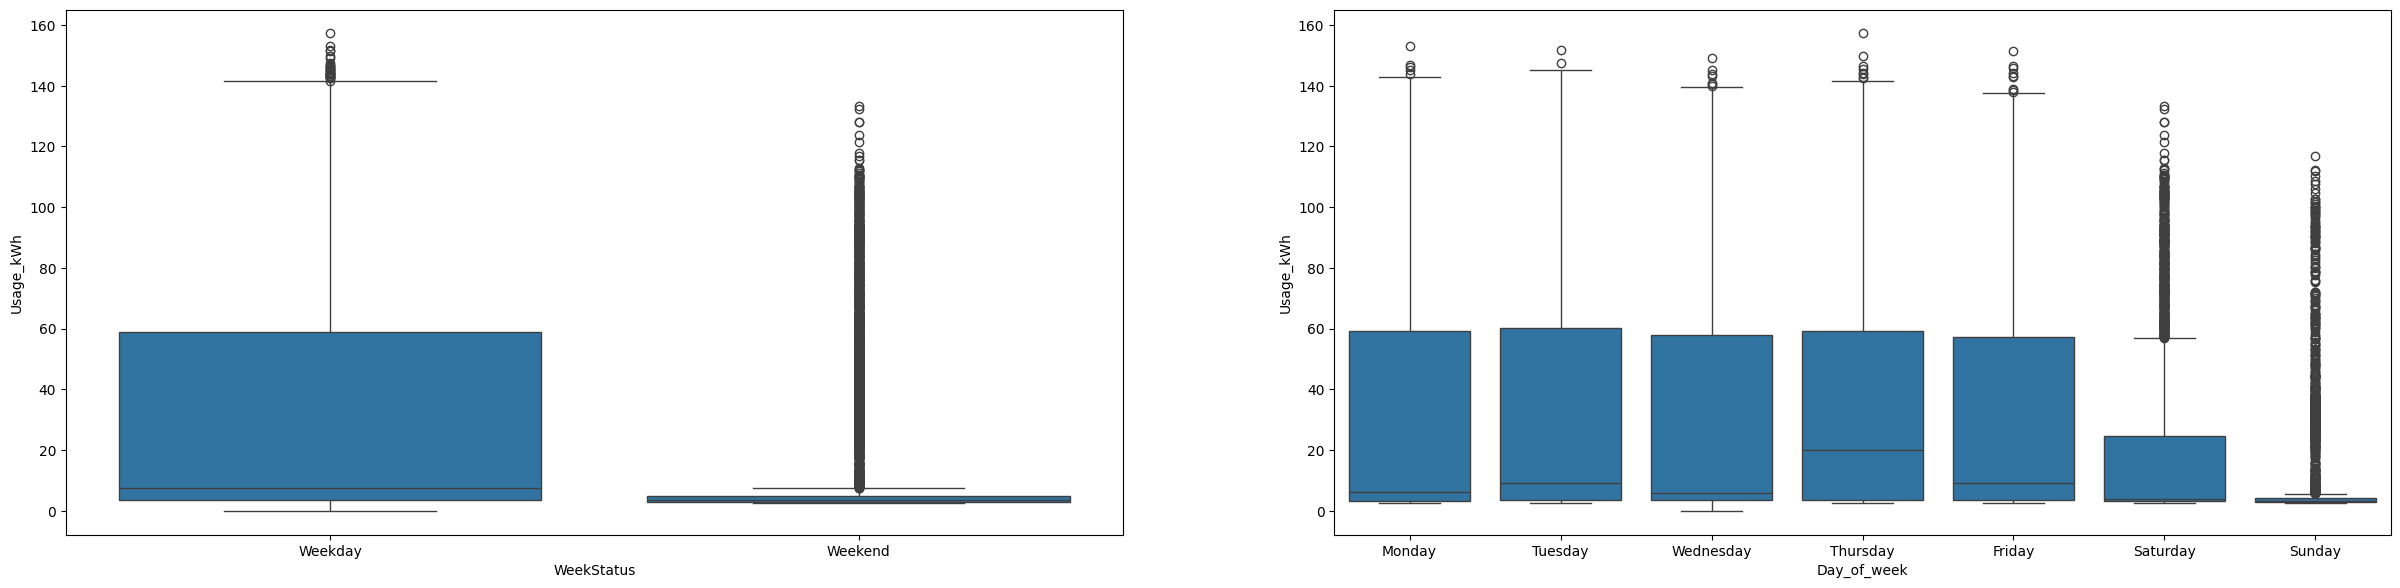

In [19]:
plt.figure(figsize=(30,15))

plt.subplot(2,2,1)
sns.boxplot(x='WeekStatus', y='Usage_kWh', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='Day_of_week', y='Usage_kWh', data=df)

plt.show()

In [20]:
print(df.groupby(['WeekStatus'])['Usage_kWh'].mean())
print("------------------------")
print(df.groupby(['Day_of_week'])['Usage_kWh'].mean())

WeekStatus
Weekday    33.624727
Weekend    11.732327
Name: Usage_kWh, dtype: float64
------------------------
Day_of_week
Friday       33.195014
Monday       33.143935
Saturday     15.919020
Sunday        7.545633
Thursday     35.112083
Tuesday      34.427614
Wednesday    32.254235
Name: Usage_kWh, dtype: float64


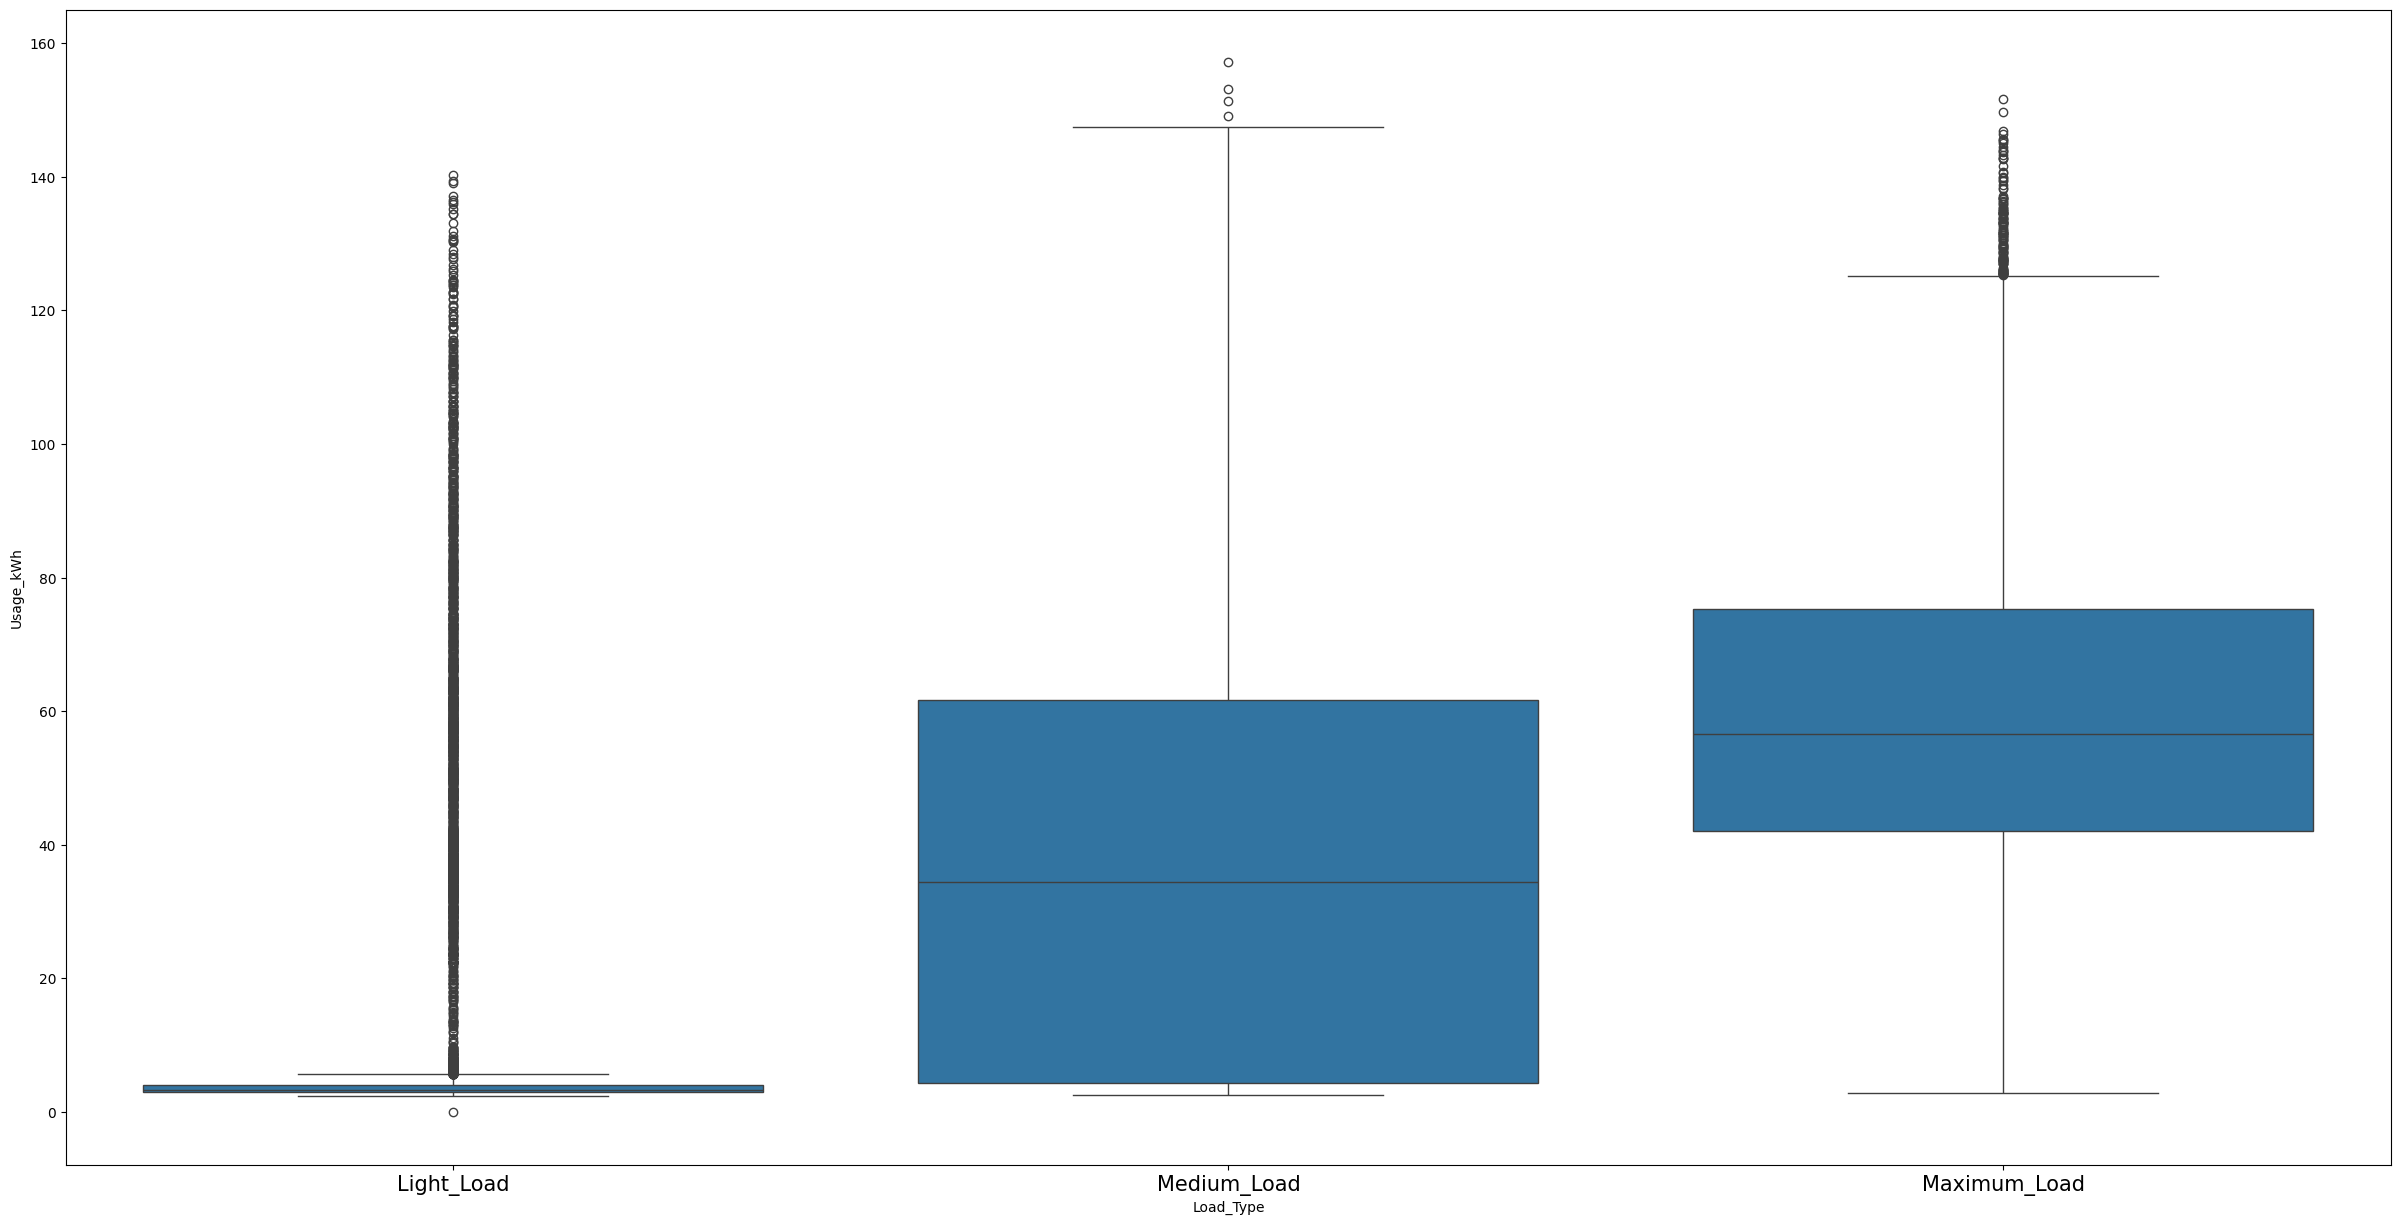

In [21]:
plt.figure(figsize=(30,15))

sns.boxplot(x='Load_Type', y='Usage_kWh', data=df)
plt.xticks(fontsize=15)

plt.show()

<ipython-input-22-d222b61e0b70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Load_Type', data=df, palette='tab10', edgecolor='white', linewidth=1.2)


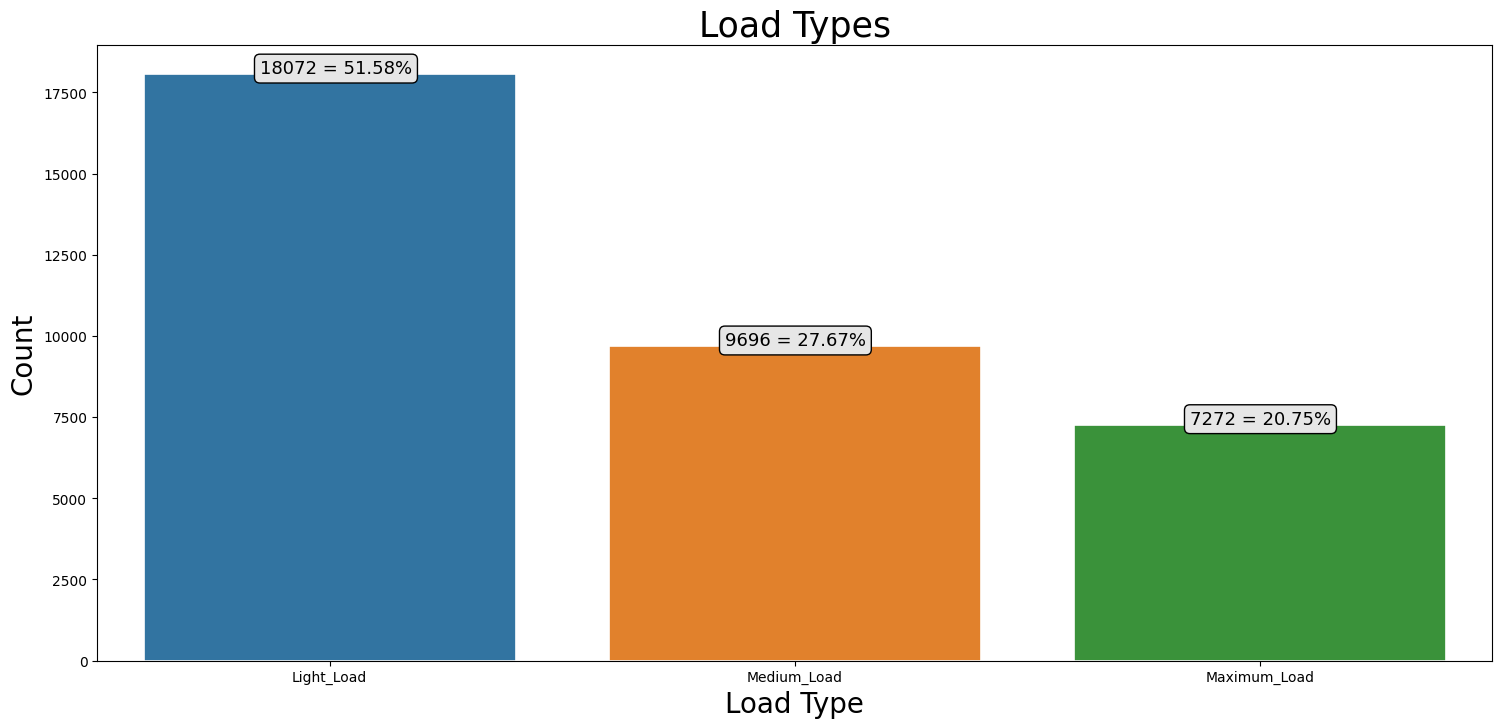

In [22]:
plt.figure(figsize=(18,8))

ax = sns.countplot(x='Load_Type', data=df, palette='tab10', edgecolor='white', linewidth=1.2)
plt.title('Load Types', fontsize = 25)
plt.xlabel('Load Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(),
         (p.get_height() / len(df['Load_Type'])) * 100),
                    (p.get_x() + 0.25, p.get_height() + 10),
                   color = 'black',
                   bbox = bbox_args,
                   fontsize = 13)
plt.show()

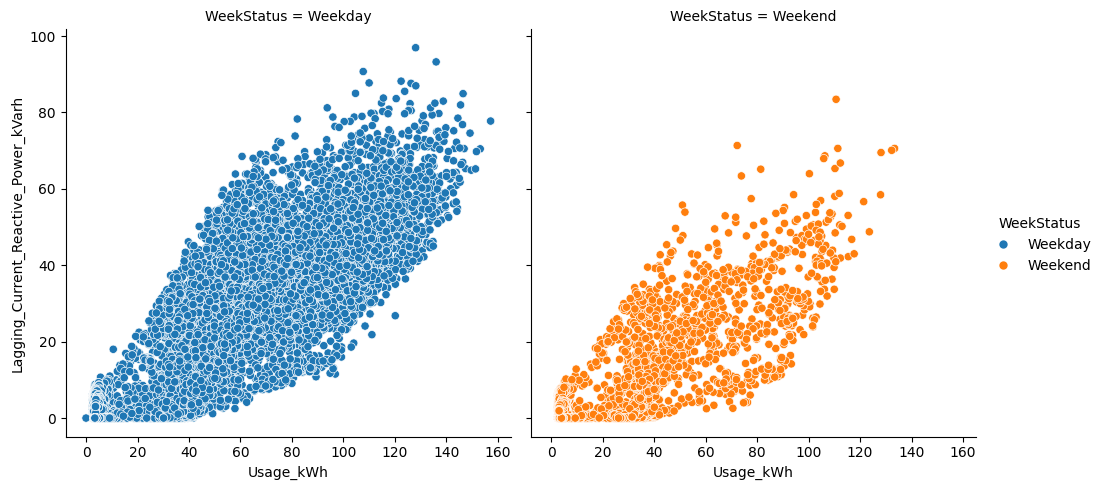

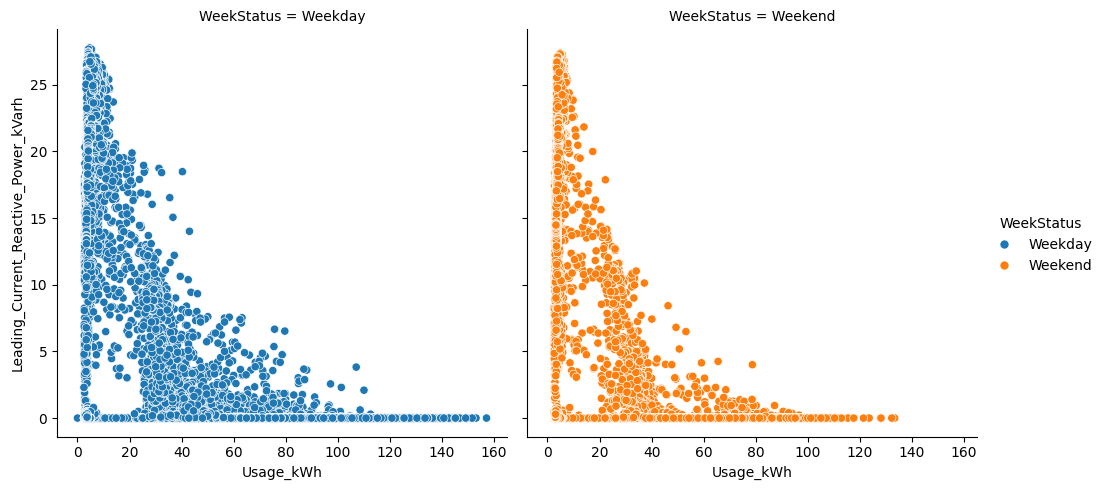

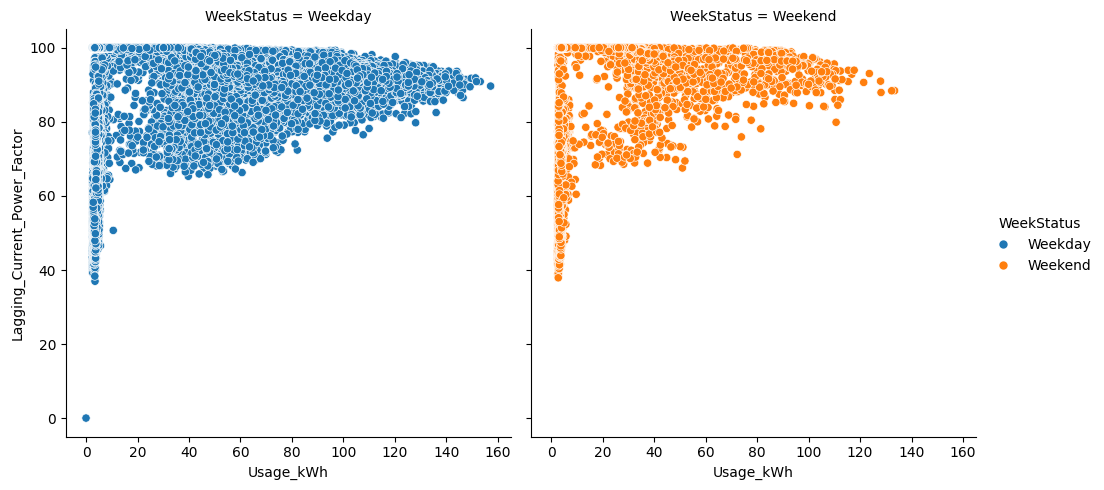

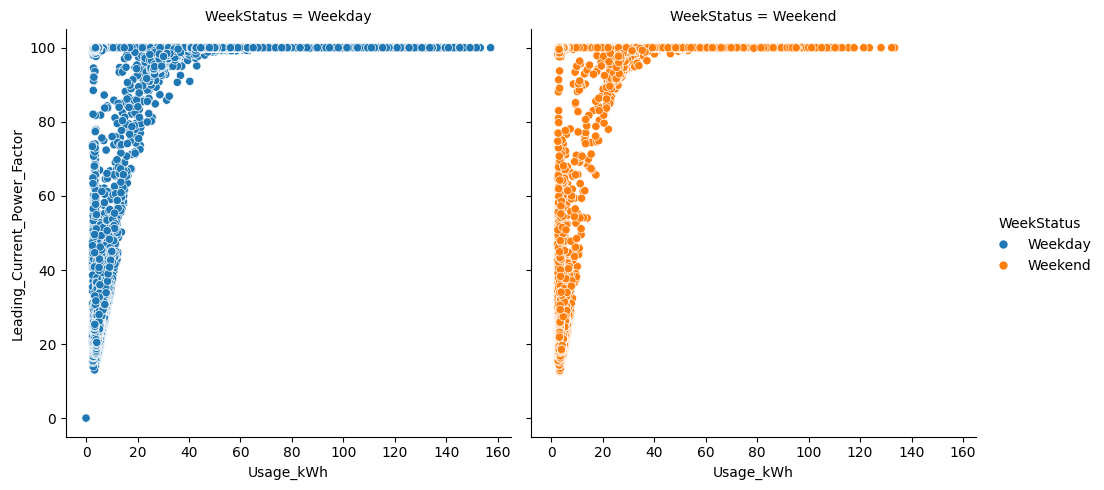

In [23]:
sns.relplot(data=df, x='Usage_kWh', y='Lagging_Current_Reactive_Power_kVarh',
            hue='WeekStatus', col='WeekStatus')
sns.relplot(data=df, x='Usage_kWh', y='Leading_Current_Reactive_Power_kVarh',
            hue='WeekStatus', col='WeekStatus')
sns.relplot(data=df, x='Usage_kWh', y='Lagging_Current_Power_Factor',
            hue='WeekStatus', col='WeekStatus')
sns.relplot(data=df, x='Usage_kWh', y='Leading_Current_Power_Factor',
            hue='WeekStatus', col='WeekStatus')

The scatterplot at the top shows a moderately strong and positive relationship of Lagging Reactive Power and Usage, while the second scatterplot shows a negative association between Leading Reactive Power and Usage. The two last scatterplots in the bottom show the relationship of Usage vs Lagging Power Factor and Usage vs Leading Power Factor which both do not show a very strong positive relation. However, we can still see that where there is high Lagging or Leading power, the Usage is also high.

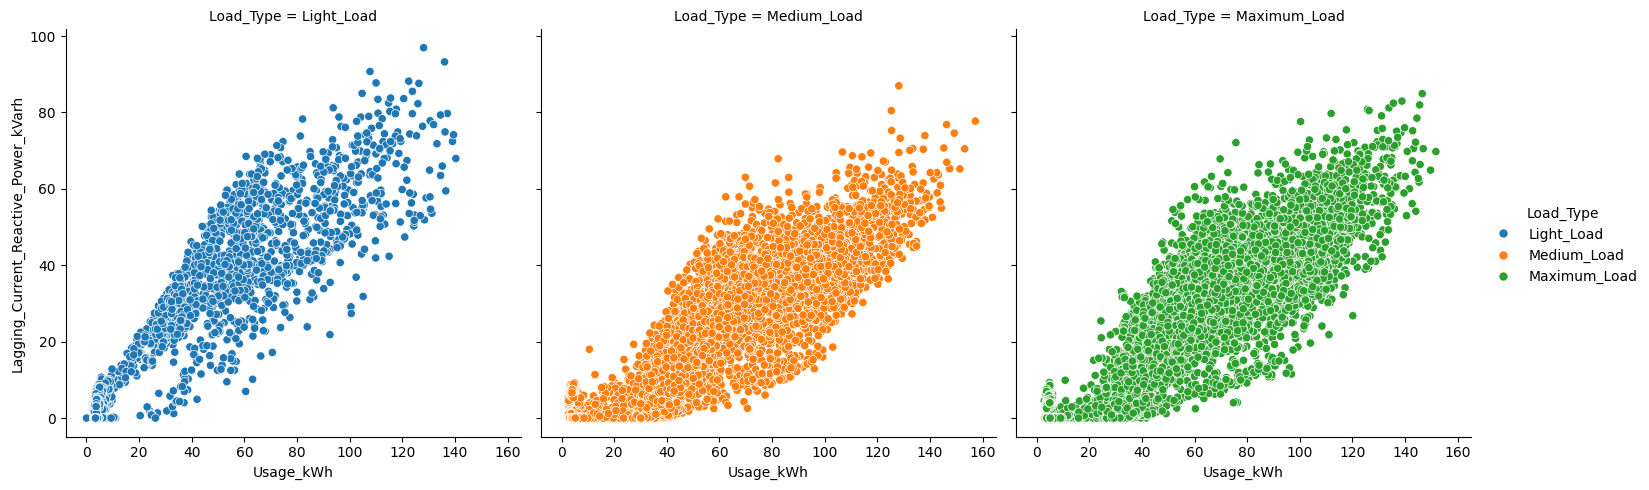

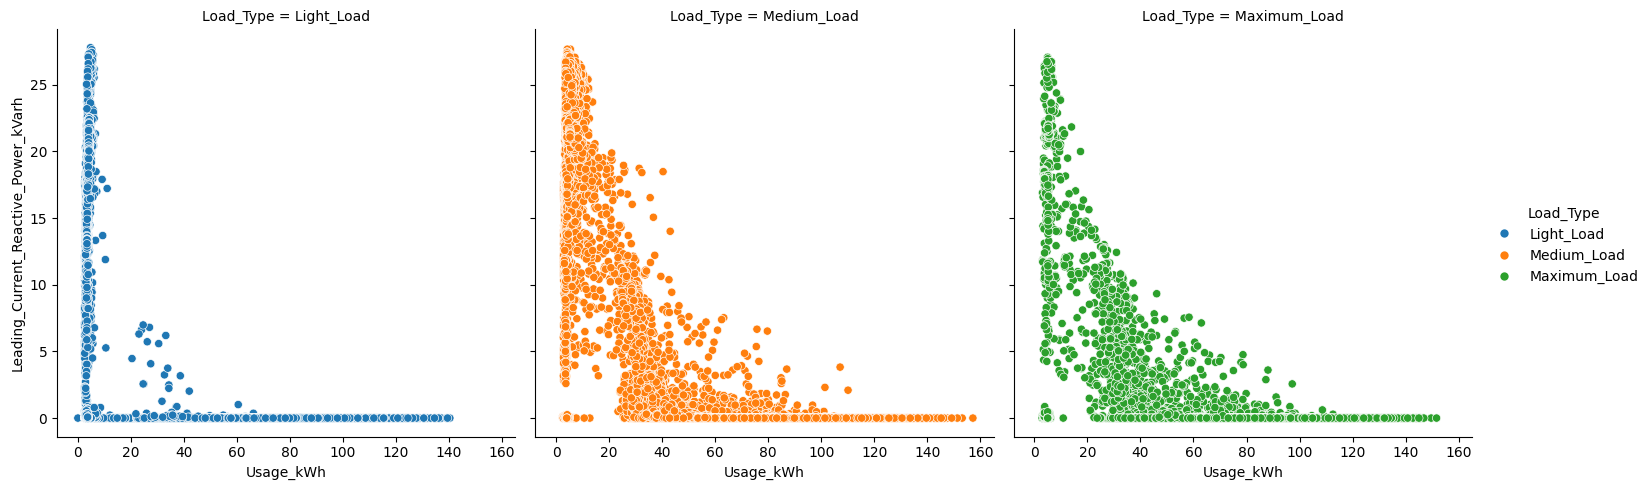

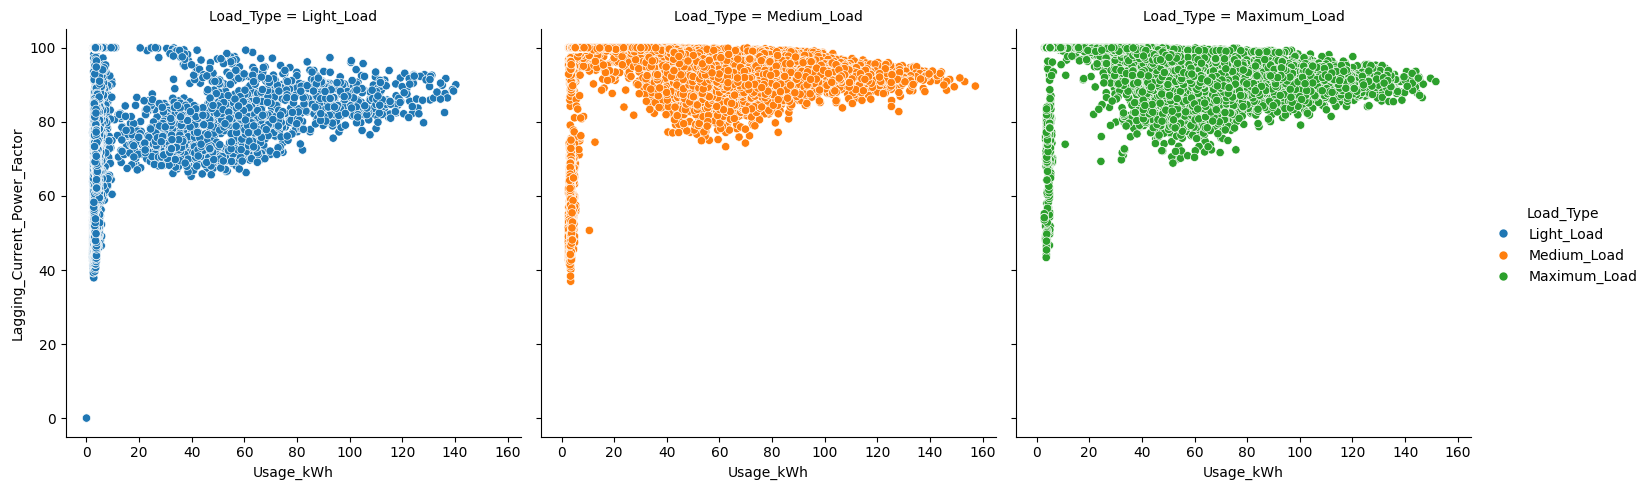

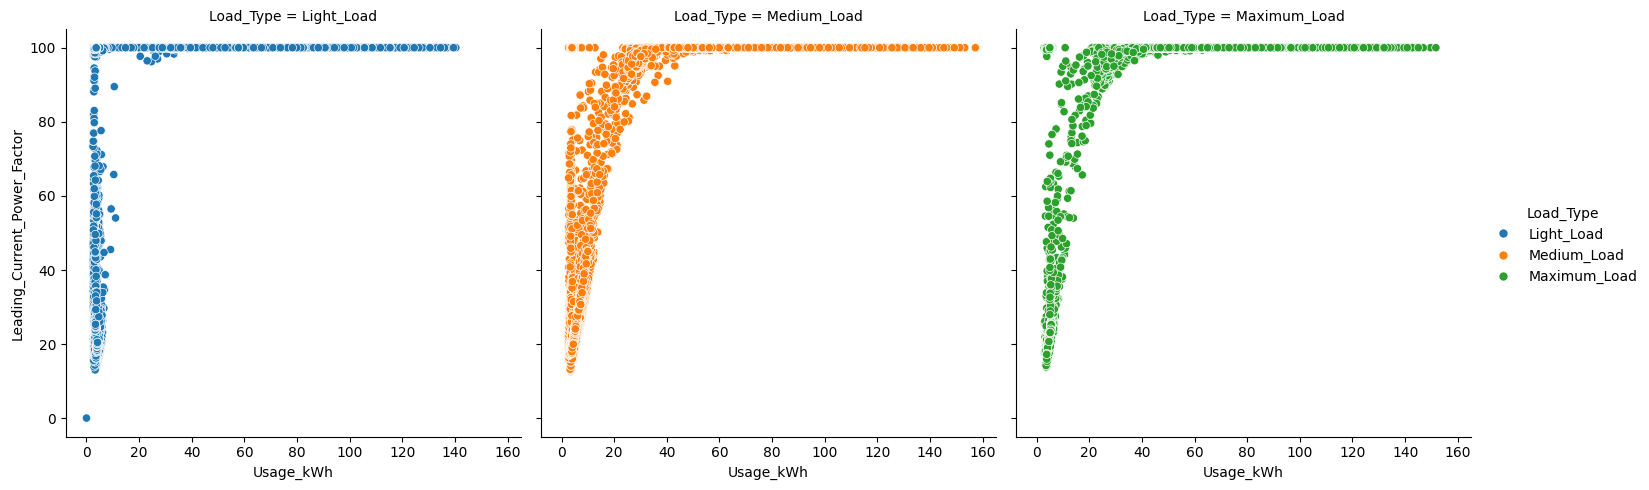

In [24]:
sns.relplot(data=df, x='Usage_kWh', y='Lagging_Current_Reactive_Power_kVarh',
            hue='Load_Type', col='Load_Type')
sns.relplot(data=df, x='Usage_kWh', y='Leading_Current_Reactive_Power_kVarh',
            hue='Load_Type', col='Load_Type')
sns.relplot(data=df, x='Usage_kWh', y='Lagging_Current_Power_Factor',
            hue='Load_Type', col='Load_Type')
sns.relplot(data=df, x='Usage_kWh', y='Leading_Current_Power_Factor',
            hue='Load_Type', col='Load_Type')

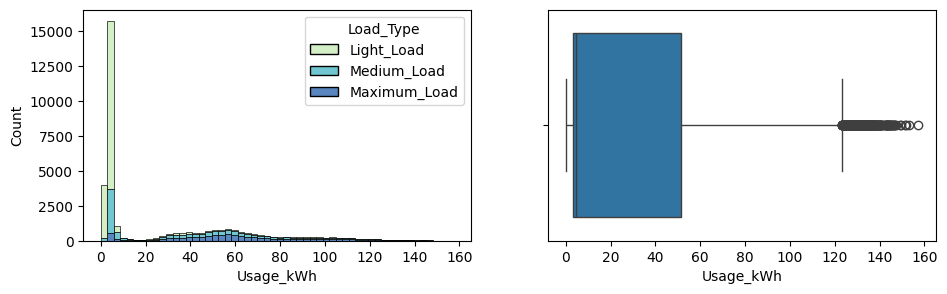

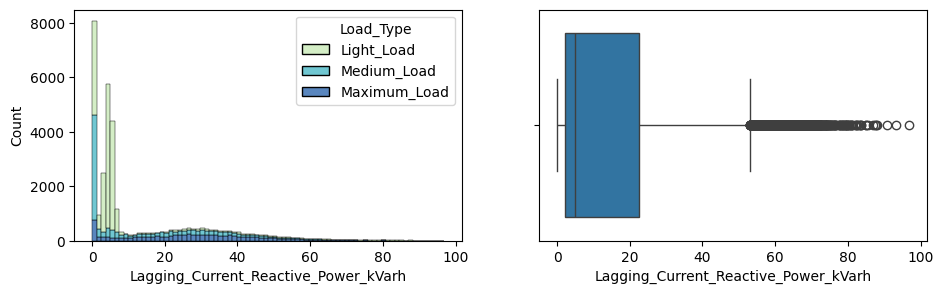

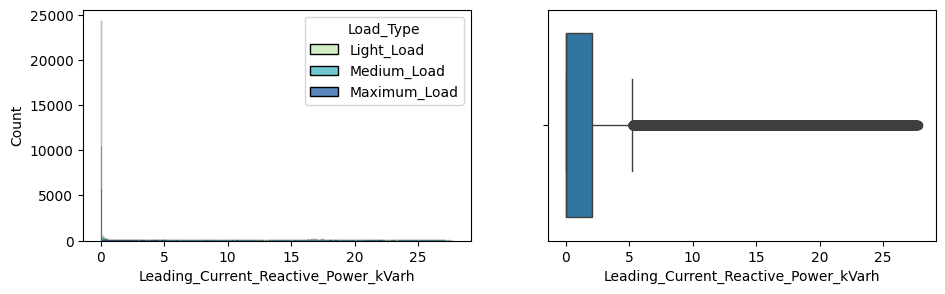

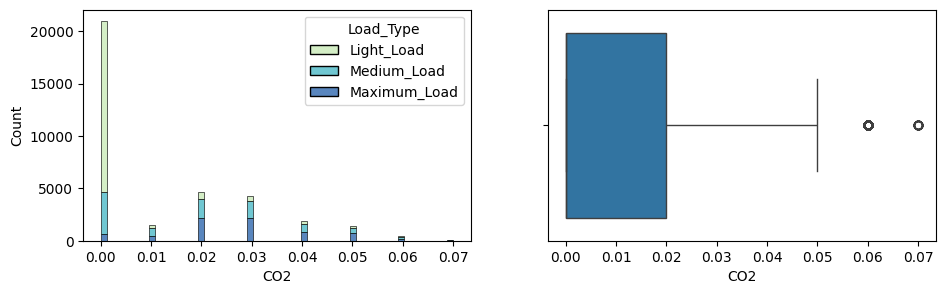

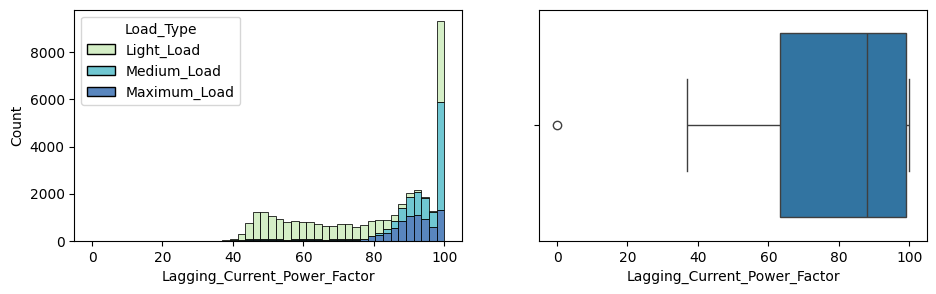

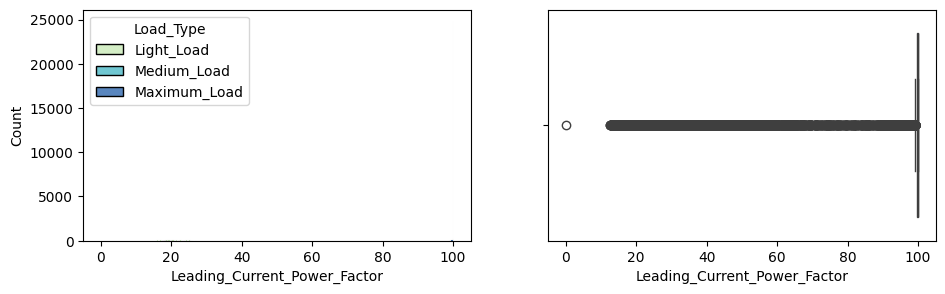

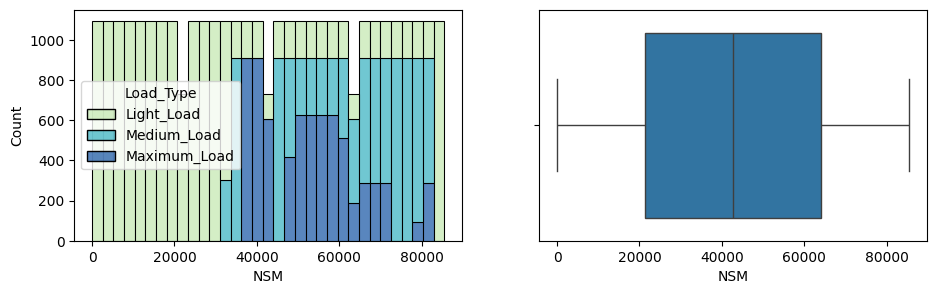

In [25]:
#Plot the numerical columns distribution and divided by Load_Type

numerical = df.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(11,3))
    sns.histplot(data=df, x=col, ax=ax[0],hue='Load_Type', palette='YlGnBu', multiple="stack")
    sns.boxplot(data=df, x=col, ax=ax[1])

The distribution charts above show the numeric values in the dataset. There are a few patterns we can notice.

Most energy consumption usages are below 5kWh, and more than 15000 records are between 2.5 and 5kWh. Lagging Reactive Power are mainly below 10kVarh. The majority of Lagging Reactive Power are at 0kVarh. More than 15000 Light Load and half of Medium Load at 0.00 CO2. The Lagging Power Factor mainly distributes between 40 to 100. The Leading Power Factor only gathers at 100. NSM values from 35000 or below is Light Load. Between 35000 to 60000 NSM are contributed by Maximum Load, and from 60000 to 80000 are mainly from Medium Load.

Data Preprocessing

In [26]:
# Convert date into datetime for better readibility and editing

df['date'] = pd.to_datetime(df['date'])
df['date']

0       2018-01-01 00:15:00
1       2018-01-01 00:30:00
2       2018-01-01 00:45:00
3       2018-01-01 01:00:00
4       2018-01-01 01:15:00
                ...        
35035   2018-12-31 23:00:00
35036   2018-12-31 23:15:00
35037   2018-12-31 23:30:00
35038   2018-12-31 23:45:00
35039   2018-12-31 00:00:00
Name: date, Length: 35040, dtype: datetime64[ns]

In [27]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['time'] = df['date'].dt.time
df = df.drop(columns=['date'])

df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year,time
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018,00:15:00
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018,00:30:00
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018,00:45:00
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018,01:00:00
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018,01:15:00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2                                   35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
 10  day                                   35040 non-null  int64  
 11  month          

In [29]:
# time column is an object. I want to convert it into numerical value, so the algorythm will compute efficiently.
# I will convert the hour and minutes into seconds and afterwards I will add all the values together. The new column will be the seconds after midnight summed up.
# Basically the NSM column we already have. I will inspect if the two columns are the same.

df['time_in_seconds'] = df['time'].apply(lambda x: x.hour * 3600 +
                                         x.minute * 60 + x.second)
df = df.drop(columns=['time'])

In [30]:
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year,time_in_seconds
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018,900
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018,1800
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018,2700
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018,3600
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018,4500


In [31]:
result = df['NSM'].equals(df['time_in_seconds'])
result

True

After evaluation, NSM and time_in_seconds, are exactly the same. So I will drop the column we created.

In [32]:
df = df.drop(columns=['time_in_seconds'])

In [33]:
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018


In [34]:
# Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder
categ = df.select_dtypes(include = "object").columns

le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,1,1,2018
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,1,1,2018
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,1,1,2018
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,1,1,2018
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,1,1,2018


In [35]:
# validate the dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2                                   35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  int64  
 8   Day_of_week                           35040 non-null  int64  
 9   Load_Type                             35040 non-null  int64  
 10  day                                   35040 non-null  int64  
 11  month          

Split The Data

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop(['Load_Type'], axis=1)
y = df.Load_Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

Models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
models = []

names = ["LogisticRegression",
         "LinearSVC",
         "KNeighborsClassifier",
         "DecisionTreeClassifier",
         "RandomForestClassifier"
         ]

In [39]:
scores = []

clf = [LogisticRegression(),
       LinearSVC(),
       KNeighborsClassifier(),
       DecisionTreeClassifier(),
       RandomForestClassifier()
       ]

In [40]:
%%time
for model in clf:
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  scores.append(score)

final_scores = pd.DataFrame(zip(names, scores), columns=['Classifier', 'Accuracy'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CPU times: user 18.4 s, sys: 871 ms, total: 19.2 s
Wall time: 18.8 s


In [41]:
final_scores.sort_values(by='Accuracy',ascending=False)

,Classifier,Accuracy
3,DecisionTreeClassifier,0.992009
4,RandomForestClassifier,0.987215
2,KNeighborsClassifier,0.879795
0,LogisticRegression,0.709589
1,LinearSVC,0.647945


Improving the best model

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters={"criterion":["gini", "entropy"],
            "max_depth":['None', 2,8,16],
            "min_samples_split":[2,4]
            }

In [44]:
tuning_model = DecisionTreeClassifier()
grids = GridSearchCV(tuning_model, parameters, cv=5)

grids.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validat

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': ['None', 2, 8, 16],
                         'min_samples_split': [2, 4]})

In [45]:
# best hyperparameters
grids.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [46]:
# best model score
grids.best_score_

0.9896879756468797

In [47]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=16)
model_dtc = dtc.fit(X_train, y_train)

In [48]:
score_dtc = model_dtc.score(X_test, y_test)
score_dtc

0.9905251141552511

The difference is too small to take into account

In [49]:
y_pred = model_dtc.predict(X_test)
y_pred

array([0, 1, 1, ..., 2, 0, 0])

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

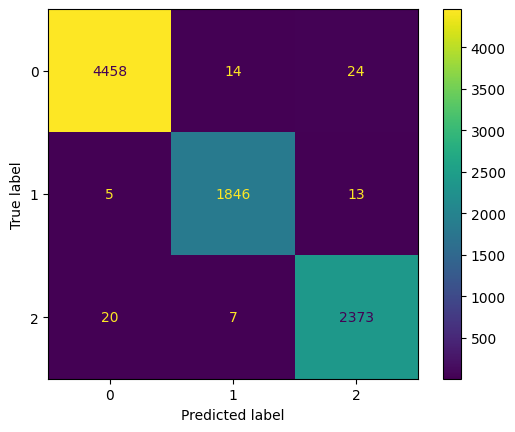

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(cm).plot()

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4496
           1       0.99      0.99      0.99      1864
           2       0.98      0.99      0.99      2400

    accuracy                           0.99      8760
   macro avg       0.99      0.99      0.99      8760
weighted avg       0.99      0.99      0.99      8760

